# Laboratorio 2

## Desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Para el desarrollo de esta actividad puedes utilizar cualquier librería externa. Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito global de la actividad y puedas desarrollar tu solución apuntando a él desde el inicio.

Al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar preguntas de negocio y de *analytics*.
2. Leer datos desde archivos y almacenarlos utilizando métodos de librerías especializadas.
3. Explorar, modificar, limpiar y unir objetos tablas de datos.
4. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
5. Implementar análisis basado en modelos estadísticos o de *machine learning*.

##  Contexto: desigualdad y factores de éxito en pruebas Saber 11 en Colombia

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas Saber 11, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (ej., matemáticas, física, inglés, etc.) y se lleva a cabo dos veces al año, ajustándose a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes diligencian un formulario que recoge información sociodemográfica y relacionada con la institución a la que pertenecen. El fin es obtener información con respecto al desempeño de los estudiantes en la prueba y de sus características.

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es la desigualdad y factores de éxito en las pruebas Saber 11. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber 11, generar un reporte acerca de sus características principales y seleccionar las partes de dicho contenido que podrían ser relevantes para el análisis.


* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones y estadísticas descriptivas.


* Proponer un modelo que busque relacionar las variables de interés con el desempeño de los estudiantes y concluir acerca de los posibles hallazgos que se podrían reportar para el *stakeholder*.


* Generar una herramienta que permita a un usuario interactuar con alguno de los parámetros del análisis realizado de forma relevante en el contexto del problema.

## Fase 1: obtener e inspeccionar archivos

En esta fase te harás una idea general del contenido de los datos y generarás un reporte al respecto (ej., imprimiendo mensajes, presentando tablas de resumen, etc.). Además, seleccionarás un segmento de los datos que consideres útil para realizar tu análisis.

Pautas generales:

* Utilizar una librería especializada para leer los archivos de datos y agregarlos según sea necesario (ej., utilizando los métodos `append` o `concat` si eliges cargarlos utilizando la librería `pandas`).
* Inspeccionar el archivo a partir de sus encabezados, columnas y descripciones de las variables según su tipo (ej., numéricas, categóricas).
* Declarar una estructura de datos (ej., una lista) para almacenar un subconjunto de variables que puedan ser relevantes para la problemática de interés.

Preguntas guía:

* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Qué planteas para manejarlos?

In [1]:
# Implementa tu respuesta en esta celda
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

datos_calendario_a = pd.read_csv("SaberProExcels/Saber_11__2020-1_20250301.csv")
datos_calendario_b = pd.read_csv("SaberProExcels/Saber_11__2020-2_20250301.csv")


In [5]:
print('Dimensiones de los conjuntos de datos Saber 11° 2020-1 y 2020-2')
print('Años evaluados: 2020' + '\n' + 'Periodos evaluados: 2, A y B' + '\n')
print('Numero de filas y columnas por calendario:')
print(f'Calendario a: Filas: {datos_calendario_a.shape[0]}. Columnas: {datos_calendario_a.shape[1]}.')
print(f'Calendario b: Filas: {datos_calendario_b.shape[0]}. Columnas: {datos_calendario_b.shape[1]}.')

print('\n' + 'Ambos conjuntos de datos cuentan con bastantes columnas, de todas las que me interesan' + '\n' + '\
para la problematica planteada son las siguientes: \n ')

cols = [2,7,8,9,13,16,17,20,22,40,48,53,74]
target_cols = np.array(datos_calendario_a.columns)[cols];
print(target_cols)

datos_depurados_calendario_a = datos_calendario_a[list(target_cols)]
datos_depurados_calendario_b = datos_calendario_b[list(target_cols)]

print('\n' + 'Numero de filas y columnas (depuradas) por calendario:')
print(f'Calendario a: Filas: {datos_depurados_calendario_a.shape[0]}. Columnas: {datos_depurados_calendario_a.shape[1]}.')
print(f'Calendario b: Filas: {datos_depurados_calendario_b.shape[0]}. Columnas: {datos_depurados_calendario_b.shape[1]}.')

datos_concatenados = pd.concat([datos_depurados_calendario_a, datos_depurados_calendario_b], axis=0)

print('\n' + 'Numero de filas y columnas resultantes de la union de ambos conjuntos de datos:')
print(f'Calendario ab: Filas: {datos_concatenados.shape[0]}. Columnas: {datos_concatenados.shape[1]}.')

print('\n' + 'Numero de valores vacios por columna: ')
print(datos_concatenados.isna().sum())

num_total_nan = datos_concatenados.isna().sum().sum()
num_total_notnull = datos_concatenados.notnull().sum().sum()
print('\n' + f'Numero total de valores faltantes: {num_total_nan}')
print(f'Numero total de valores validos: {num_total_notnull}')

print(f'Procentaje de datos faltantes: {round((num_total_nan * 100) / (num_total_nan + num_total_notnull), 2)} %')

print('\n' + f'Dado que tenemos un total de {datos_concatenados.shape[0]} filas, y un total de {datos_concatenados.isna().sum().sum()} valores \n\
faltantes, para este caso voy a eliminar las filas que cuenten con valores vacios' + '\n' +'ya que aun con esas filas removidas seguiremos teniendo \
un valor significativo de' + '\n' + 'filas validas con las que poder trabajar. De esta manera tambien, el modelo tendra una mayor presición.')

df = datos_concatenados.dropna()

print('\n' + 'Numero de filas y columnas resultantes de la depuración de valores faltantes:')
print(f'Filas: {df.shape[0]}. Columnas: {df.shape[1]}.')

print('\n' + 'Este sera el dataframe con el que realizarmos el modelo y obtendremos las estadisticas.')

Dimensiones de los conjuntos de datos Saber 11° 2020-1 y 2020-2
Años evaluados: 2020
Periodos evaluados: 2, A y B

Numero de filas y columnas por calendario:
Calendario a: Filas: 15435. Columnas: 78.
Calendario b: Filas: 504872. Columnas: 81.

Ambos conjuntos de datos cuentan con bastantes columnas, de todas las que me interesan
para la problematica planteada son las siguientes: 
 
['ESTU_GENERO' 'ESTU_PAIS_RESIDE' 'ESTU_TIENEETNIA' 'ESTU_DEPTO_RESIDE'
 'FAMI_ESTRATOVIVIENDA' 'FAMI_EDUCACIONPADRE' 'FAMI_EDUCACIONMADRE'
 'FAMI_TIENEINTERNET' 'FAMI_TIENECOMPUTADOR' 'COLE_GENERO'
 'COLE_AREA_UBICACION' 'COLE_DEPTO_UBICACION' 'PUNT_GLOBAL']

Numero de filas y columnas (depuradas) por calendario:
Calendario a: Filas: 15435. Columnas: 13.
Calendario b: Filas: 504872. Columnas: 13.

Numero de filas y columnas resultantes de la union de ambos conjuntos de datos:
Calendario ab: Filas: 520307. Columnas: 13.

Numero de valores vacios por columna: 
ESTU_GENERO                 9
ESTU_PAIS_RESIDE   

## Fase 2: identificar características y relaciones en las variables

En esta fase realizarás análisis descriptivo para identificar posibles patrones o relaciones entre las variables de interés para la problemática planteada. Además, expondrás estadísticas descriptivas y visualizaciones para concluir al respecto de los patrones y las relaciones identificadas. Finalmente, elegirás el segmento de los datos sobre el cual profundizarás con tu análisis (este puede ser, o no, igual al seleccionado anteriormente).

Pautas generales:

* Calcular estadísticas descriptivas básicas (por lo menos, media/mediana y varianza/desviación) para cada variable sociodemográfica relevante en el contexto del problema.
* Utilizar librerías especializadas (ej., `matplotlib`, `seaborn`, etc.) para inspeccionar visualmente variables de interés. Los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser útiles.
* Utilizar el método `groupby` de `pandas`, en conjunto con métodos de visualización, puede proveer evidencia del impacto de las variables sociodemográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:

* ¿Hay patrones de interés en las distribuciones de las variables o en las relaciones entre ellas?
* ¿Consideras que existe algún impacto significativo de variables sociodemográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables harías un análisis más profundo?

Estadísticas descriptivas básicas:
         PUNT_GLOBAL
count  488206.000000
mean      250.424243
std        49.240142
min         0.000000
25%       213.000000
50%       247.000000
75%       284.000000
max       500.000000

 Podemos observar, sobre todo en los diagramas de cajas y bigotes, que para las variables seleccionadas 
 encontramos una cantidad enorme de valores atipicos que seguramente afectaran de manera significativa 
 el rendimiento y presicion de nuestro modelo. 

Graficas de estadisticas relevantes: 


C:\Users\Edwin\AppData\Local\Temp\ipykernel_8952\1664993164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["FAMI_ESTRATOVIVIENDA"] = pd.Categorical(


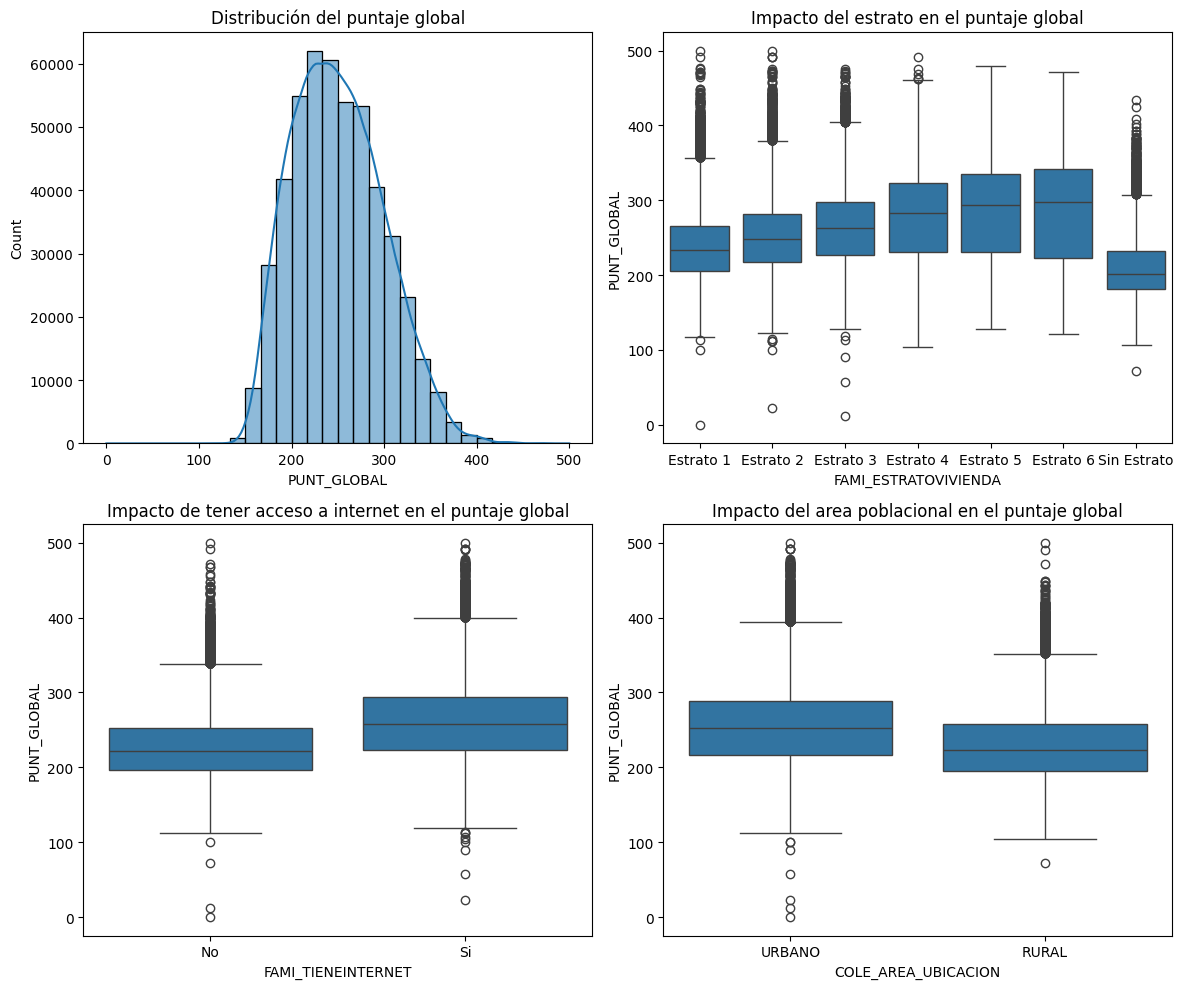

En base a los diagramas anteriores, podemos afirmar lo siguiente: 
 - La gran mayoria de participantes obtuvieron puntajes globales entre 200 y 300. 
 - La mediana del puntaje global aumenta conforme aumenta el estrato social, por lo que existe 
   una relacion directamente proporcional entre el puntaje y el estrato. 
 - Los participantes con acceso a internet obtienen mejores puntajes. 
 - Los participantes que residen en areas urbanas obtienen mejores puntajes que aquellos que residen en areas rurales.


In [6]:
# Implementa tu respuesta en esta celda

print('Estadísticas descriptivas básicas:')
print(df.describe())

print('\n Podemos observar, sobre todo en los diagramas de cajas y bigotes, que para las variables seleccionadas \
\n encontramos una cantidad enorme de valores atipicos que seguramente afectaran de manera significativa \
\n el rendimiento y presicion de nuestro modelo. \n')

df_encoded = pd.get_dummies(df, drop_first=True)

print('Graficas de estadisticas relevantes: ')
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df["PUNT_GLOBAL"], bins=30, kde=True, ax=axes[0, 0]).set_title("Distribución del puntaje global")
df["FAMI_ESTRATOVIVIENDA"] = pd.Categorical(
    df["FAMI_ESTRATOVIVIENDA"], 
    categories=["Estrato 1", "Estrato 2", "Estrato 3", "Estrato 4", "Estrato 5", "Estrato 6", "Sin Estrato"],
    ordered=True
)
sns.boxplot(x=df["FAMI_ESTRATOVIVIENDA"], y=df["PUNT_GLOBAL"], ax=axes[0, 1]).set_title("Impacto del estrato en el puntaje global")
sns.boxplot(x=df["FAMI_TIENEINTERNET"], y=df["PUNT_GLOBAL"], ax=axes[1, 0]).set_title("Impacto de tener acceso a internet en el puntaje global")
sns.boxplot(x=df["COLE_AREA_UBICACION"], y=df["PUNT_GLOBAL"], ax=axes[1, 1]).set_title("Impacto del area poblacional en el puntaje global")
plt.tight_layout()
plt.show()

print('En base a los diagramas anteriores, podemos afirmar lo siguiente: \
\n - La gran mayoria de participantes obtuvieron puntajes globales entre 200 y 300. \
\n - La mediana del puntaje global aumenta conforme aumenta el estrato social, por lo que existe \
\n   una relacion directamente proporcional entre el puntaje y el estrato. \
\n - Los participantes con acceso a internet obtienen mejores puntajes. \
\n - Los participantes que residen en areas urbanas obtienen mejores puntajes que aquellos que residen en areas rurales.')


## Fase 3: abordar relación variables-desempeño a través de un modelo

En esta fase propondrás, implementarás y reportarás el desempeño de uno o más modelos (al menos uno predictivo) que busquen explicar las relaciones entre factores sociodemográficos y el desempeño en la prueba. Además, concluirás con respecto a la validez de al menos un modelo y los posibles hallazgos que se podrían reportar para el *stakeholder*.

Pautas generales:

* Seleccionar variables y proponer modelos acordes a estas y al contexto del problema.
* Utilizar librerías especializadas (ej., `statsmodels`, `sklearn`, etc.) para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Los módulos correspondientes a regresión lineal y regresión logística pueden ser útiles.
* Asegurar el cumplimiento de los supuestos y buenas prácticas de cada modelo.
* Utilizar las métricas de evaluación de desempeño (disponibles en las librerías especilizadas), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:

* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?

In [ ]:
#Mejoras a la estructura de los datos

dfCopy = df.copy()

dept_cods = {
    "AMAZONAS": 91, "ANTIOQUIA": 5, "ARAUCA": 81, "ATLANTICO": 8, "BOGOTÁ": 11, "BOLIVAR": 13,
    "BOYACA": 15, "CALDAS": 17, "CAQUETA": 18, "CASANARE": 85, "CAUCA": 19, "CESAR": 20, "CHOCO": 27,
    "CORDOBA": 23, "CUNDINAMARCA": 25, "GUAINIA": 94, "GUAVIARE": 95, "HUILA": 41, "LA GUAJIRA": 44,
    "MAGDALENA": 47, "META": 50, "NARIÑO": 52, "NORTE SANTANDER": 54, "PUTUMAYO": 86, "QUINDIO": 63,
    "RISARALDA": 66, "SAN ANDRES": 88, "SANTANDER": 68, "SUCRE": 70, "TOLIMA": 73, "VALLE": 76,
    "VAUPES": 97, "VICHADA": 99, "EXTRANJERO": 99
}

country_numeric_codes = {
    'COLOMBIA': 170,
    'ESPAÑA': 724,
    'ESTADOS UNIDOS': 840,
    'PAÍSES BAJOS - HOLANDA': 528,
    'ALEMANIA': 276,
    'ARGENTINA': 32,
    'BRASIL': 76,
    'CHILE': 152,
    'COREA DEL NORTE': 408,
    'CUBA': 192,
    'ECUADOR': 218,
    'EL SALVADOR': 222,
    'FRANCIA': 250,
    'HAITI': 332,
    'HONDURAS': 340,
    'ITALIA': 380,
    'MÉXICO': 484,
    'NICARAGUA': 558,
    'PORTUGAL': 620,
    'VENEZUELA': 862,
    'SUIZA': 756,
    'GUATEMALA': 320,
    'PERÚ': 604,
    'COREA DEL SUR': 410,
    'URUGUAY': 858,
    'ESTADOS FEDERADOS DE MICRONESIA': 583,
    'BOLIVIA': 68,
    'PANAMÁ': 591,
    'REPÚBLICA DOMINICANA': 214,
    'WALLIS Y FUTUNA': 876,
    'CABO VERDE': 132,
    'VANUATU': 548,
    'VIETNAM': 704,
    'JAPÓN': 392,
    'ARABIA SAUDITA': 682,
    'RUSIA': 643,
    'EGIPTO': 818,
    'IRÁN': 364,
    'REINO UNIDO': 826,
    'COSTA RICA': 188,
    'CHINA': 156,
    'LITUANIA': 440,
    'CURAZAO': 531,
    'ARUBA': 533,
    'PARAGUAY': 600,
    'TURQUÍA': 792,
    'OMÁN': 512
}

print(country_numeric_codes)


estrato_cods = { "Sin Estrato": 7, "Estrato 1": 1, "Estrato 2": 2, "Estrato 3": 3, "Estrato 4": 4, "Estrato 5": 5, "Estrato 6": 6 }

genero_col_cods = { "MIXTO": 1, "FEMENINO": 2, "MASCULINO": 3 }

def map_based_on_dict(text, dict):
    x = dict.get(text)
    if x: return x
    else: return text

def map_sino(texto):
    if texto == "Si": return 1
    else: return 0

dfCopy.loc[:, "ESTU_PAIS_RESIDE"] = df["ESTU_PAIS_RESIDE"].astype(str).map(lambda dep : map_based_on_dict(dep, country_numeric_codes))
dfCopy.loc[:, "COLE_GENERO"] = df["COLE_GENERO"].astype(str).map(lambda dep : map_based_on_dict(dep, genero_col_cods))
dfCopy.loc[:, "ESTU_DEPTO_RESIDE"] = df["ESTU_DEPTO_RESIDE"].astype(str).map(lambda dep : map_based_on_dict(dep, dept_cods))
dfCopy.loc[:, "COLE_DEPTO_UBICACION"] = df["COLE_DEPTO_UBICACION"].astype(str).map(lambda dep : map_based_on_dict(dep, dept_cods))
dfCopy.loc[:, "FAMI_ESTRATOVIVIENDA"] = df["FAMI_ESTRATOVIVIENDA"].astype(str).map(lambda dep : map_based_on_dict(dep, estrato_cods))
dfCopy.loc[:, "FAMI_EDUCACIONPADRE"] = df["FAMI_EDUCACIONPADRE"].astype(str).map(lambda dep : dep.split()[0])
dfCopy.loc[:, "FAMI_EDUCACIONMADRE"] = df["FAMI_EDUCACIONMADRE"].astype(str).map(lambda dep : dep.split()[0])

edu_cods = { "Primaria": 7, "Secundaria": 1, "Técnica": 2, "Educación": 3, "Ninguno": 4, "Postgrado": 5, "No": 6 }

dfCopy.loc[:, "FAMI_EDUCACIONPADRE"] = dfCopy["FAMI_EDUCACIONPADRE"].astype(str).map(lambda dep : map_based_on_dict(dep, edu_cods))
dfCopy.loc[:, "FAMI_EDUCACIONMADRE"] = dfCopy["FAMI_EDUCACIONMADRE"].astype(str).map(lambda dep : map_based_on_dict(dep, edu_cods))

dfCopy.loc[:, "FAMI_TIENEINTERNET"] = df["FAMI_TIENEINTERNET"].astype(str).map(lambda dep : int(dep == "Si"))
dfCopy.loc[:, "ESTU_GENERO"] = df["ESTU_GENERO"].astype(str).map(lambda dep : int(dep == 'M'))
dfCopy.loc[:, "FAMI_TIENECOMPUTADOR"] = df["FAMI_TIENECOMPUTADOR"].astype(str).map(lambda dep : int(dep == "Si"))
dfCopy.loc[:, "COLE_AREA_UBICACION"] = df["COLE_AREA_UBICACION"].astype(str).map(lambda dep : int(dep == "URBANO"))
dfCopy.loc[:, "ESTU_TIENEETNIA"] = df["ESTU_TIENEETNIA"].astype(str).map(lambda dep : int(dep == "Si"))


#dfCopy.to_excel("output.xlsx")

{'COLOMBIA': 170, 'ESPAÑA': 724, 'ESTADOS UNIDOS': 840, 'PAÍSES BAJOS - HOLANDA': 528, 'ALEMANIA': 276, 'ARGENTINA': 32, 'BRASIL': 76, 'CHILE': 152, 'COREA DEL NORTE': 408, 'CUBA': 192, 'ECUADOR': 218, 'EL SALVADOR': 222, 'FRANCIA': 250, 'HAITI': 332, 'HONDURAS': 340, 'ITALIA': 380, 'MÉXICO': 484, 'NICARAGUA': 558, 'PORTUGAL': 620, 'VENEZUELA': 862, 'SUIZA': 756, 'GUATEMALA': 320, 'PERÚ': 604, 'COREA DEL SUR': 410, 'URUGUAY': 858, 'ESTADOS FEDERADOS DE MICRONESIA': 583, 'BOLIVIA': 68, 'PANAMÁ': 591, 'REPÚBLICA DOMINICANA': 214, 'WALLIS Y FUTUNA': 876, 'CABO VERDE': 132, 'VANUATU': 548, 'VIETNAM': 704, 'JAPÓN': 392, 'ARABIA SAUDITA': 682, 'RUSIA': 643, 'EGIPTO': 818, 'IRÁN': 364, 'REINO UNIDO': 826, 'COSTA RICA': 188, 'CHINA': 156, 'LITUANIA': 440, 'CURAZAO': 531, 'ARUBA': 533, 'PARAGUAY': 600, 'TURQUÍA': 792, 'OMÁN': 512}


C:\Users\Edwin\AppData\Local\Temp\ipykernel_8952\3861581717.py:84: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 ... 2 2 3]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  dfCopy.loc[:, "FAMI_ESTRATOVIVIENDA"] = df["FAMI_ESTRATOVIVIENDA"].astype(str).map(lambda dep : map_based_on_dict(dep, estrato_cods))


In [52]:
print(dfCopy['ESTU_GENERO'].unique())
print(dfCopy['ESTU_PAIS_RESIDE'].unique())
print(dfCopy['ESTU_TIENEETNIA'].unique())
print(dfCopy['ESTU_DEPTO_RESIDE'].unique())
print(dfCopy['FAMI_ESTRATOVIVIENDA'].unique())
print(dfCopy['FAMI_EDUCACIONPADRE'].unique())
print(dfCopy['FAMI_EDUCACIONMADRE'].unique())
print(dfCopy['FAMI_TIENEINTERNET'].unique())
print(dfCopy['FAMI_TIENECOMPUTADOR'].unique())
print(dfCopy['COLE_GENERO'].unique())
print(dfCopy['COLE_AREA_UBICACION'].unique())
print(dfCopy['COLE_DEPTO_UBICACION'].unique())

[0 1]
[170 724 840 528 276 32 76 152 408 192 218 222 250 332 340 380 484 558 620
 862 756 320 604 410 858 583 68 591 214 876 132 548 704 392 682 643 818
 364 826 188 156 440 531 533 600 792 512]
[0 1]
[20 19 86 66 5 11 50 63 76 25 8 52 17 15 18 68 13 85 54 41 23 81 73 47 94
 44 27 70 95 99 91 88 97]
[1 6 5 2 4 3 7]
[7 1 2 3 4 5 6]
[7 1 3 5 4 2 6]
[0 1]
[0 1]
[1 2 3]
[1 0]
[20 19 86 66 5 11 50 63 76 25 8 52 17 68 15 18 13 54 41 23 73 85 47 81 44
 70 95 27 99 91 88 97 94]


In [53]:
# Implementa tu respuesta en esta celda

#Separamos el puntaje global del resto de columnas, para poder comparar el mismo con los valores de las demas variables/columnas
X = dfCopy.drop(columns=["PUNT_GLOBAL"])
y = dfCopy["PUNT_GLOBAL"]
X = pd.get_dummies(X, drop_first=True)

# Dividimos los datos en datos de entrenamiento y datos de prueba, asignamos un tamaño de prueba del 20% para evitar sobre entrenamiento del modelo.
# Pasamos 42 al argumento random_state para obtener resultados fijos y evitar que el resultado del entrenamiento varie con distintas ejecuciones.
# https://platzi.com/discusiones/1457-machine-learning-2018/49793-porque-igualamos-a-42-el-random_state-al-dividir-los-datos/ 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciamos el modelo y posteriormente lo entrenamos
# Esto tomara alrededor de 8 minutos
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluamos el modelo realizando una prediccion
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))



MSE: 1807.42223894283
RMSE: 42.51378880954778
R2 Score: 0.25069529470073004


Run v1: 
* MSE: 1868.9260693557778
* RMSE: 43.23107758726097
* R2 Score: 0.225197594977114

Run v2 (with numeric changes)
* MSE: 1807.42223894283
* RMSE: 42.51378880954778
* R2 Score: 0.25069529470073004

## Fase 4

Deberás elegir y realizar una de las dos alternativas que se encuentran a continuación.

### Alternativa 1: desarrollar una herramienta interactiva de análisis

En esta fase desarrollarás, a partir de alguno de los análisis realizados, una herramienta interactiva que sea relevante en el contexto del problema, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

Pautas generales:

* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar el/los parámetro(s) que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar una librería especializada (ej., `ipywidgets`, `panel`, etc.) para implementar la herramienta.

Preguntas guía:

* ¿Cuál o cuáles preguntas podrá hacerle el usuario a la herramienta y cómo aporta la respuesta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta?

In [67]:
# Implementa tu respuesta en esta celda
#Celda de código para poder probar diferentes valores y no tener que entrenar nuevamente el modelo.

def map_values_to_numeric_ones(input_dict):
    return {
        "ESTU_GENERO": int(input_dict.get("ESTU_GENERO") == 'M'),
        "ESTU_PAIS_RESIDE": map_based_on_dict(input_dict.get("ESTU_PAIS_RESIDE"), country_numeric_codes),
        "ESTU_TIENEETNIA": int(input_dict.get("ESTU_TIENEETNIA") == "Si"),
        "ESTU_DEPTO_RESIDE": map_based_on_dict(input_dict.get("ESTU_DEPTO_RESIDE"), dept_cods),
        "FAMI_ESTRATOVIVIENDA": map_based_on_dict(input_dict.get("FAMI_ESTRATOVIVIENDA"), estrato_cods),
        "FAMI_EDUCACIONPADRE": map_based_on_dict(input_dict.get("FAMI_EDUCACIONPADRE"), edu_cods),
        "FAMI_EDUCACIONMADRE": map_based_on_dict(input_dict.get("FAMI_EDUCACIONMADRE"), edu_cods),
        "FAMI_TIENEINTERNET": int(input_dict.get("FAMI_TIENEINTERNET") == "Si"),
        "FAMI_TIENECOMPUTADOR": int(input_dict.get("FAMI_TIENECOMPUTADOR") == "Si"),
        "COLE_GENERO": map_based_on_dict(input_dict.get("COLE_GENERO"), genero_col_cods),
        "COLE_AREA_UBICACION": int(input_dict.get("COLE_AREA_UBICACION") == "URBANO"),
        "COLE_DEPTO_UBICACION": map_based_on_dict(input_dict.get("COLE_DEPTO_UBICACION"), dept_cods),
    }

# Definición de función para calcular puntaje global
def predecir_puntaje_global(input_dict, map_dict = False):
    if (map_dict): input_dict = map_values_to_numeric_ones(input_dict)
    print(input_dict)
    input_df = pd.DataFrame([input_dict])
    input_df = pd.get_dummies(input_df)
    input_df = input_df.reindex(columns=X.columns, fill_value=0)
    return model.predict(input_df)[0]

#Resoltado de ejecutar: df.iloc[50]

# ESTU_GENERO                        F
# ESTU_PAIS_RESIDE            COLOMBIA
# ESTU_TIENEETNIA                   No
# ESTU_DEPTO_RESIDE       CUNDINAMARCA
# FAMI_ESTRATOVIVIENDA       Estrato 6
# FAMI_EDUCACIONPADRE        Postgrado
# FAMI_EDUCACIONMADRE        Postgrado
# FAMI_TIENEINTERNET                Si
# FAMI_TIENECOMPUTADOR              Si
# COLE_GENERO                    MIXTO
# COLE_AREA_UBICACION            RURAL
# COLE_DEPTO_UBICACION    CUNDINAMARCA
# PUNT_GLOBAL                      289


datos_prueba = {
    "ESTU_GENERO": "F",
    "ESTU_PAIS_RESIDE": "COLOMBIA",
    "ESTU_TIENEETNIA": "No",
    "ESTU_DEPTO_RESIDE": "CUNDINAMARCA",
    "FAMI_ESTRATOVIVIENDA": "Estrato 6",
    "FAMI_EDUCACIONPADRE": "Postgrado",
    "FAMI_EDUCACIONMADRE": "Postgrado",
    "FAMI_TIENEINTERNET": "Si",
    "FAMI_TIENECOMPUTADOR": "Si",
    "COLE_GENERO": "MIXTO",
    "COLE_AREA_UBICACION": "RURAL",
    "COLE_DEPTO_UBICACION": "CUNDINAMARCA"
}

datos_prueba2 = {
    "ESTU_GENERO": "M",
    "ESTU_PAIS_RESIDE": "COLOMBIA",
    "ESTU_TIENEETNIA": "No",
    "ESTU_DEPTO_RESIDE": "CUNDINAMARCA",
    "FAMI_ESTRATOVIVIENDA": "Estrato 6",
    "FAMI_EDUCACIONPADRE": "Postgrado",
    "FAMI_EDUCACIONMADRE": "Postgrado",
    "FAMI_TIENEINTERNET": "Si",
    "FAMI_TIENECOMPUTADOR": "Si",
    "COLE_GENERO": "MIXTO",
    "COLE_AREA_UBICACION": "URBANO",
    "COLE_DEPTO_UBICACION": "CUNDINAMARCA"
}

print("Predicción de puntaje global: ", predecir_puntaje_global(datos_prueba))

{'ESTU_GENERO': 'F', 'ESTU_PAIS_RESIDE': 'COLOMBIA', 'ESTU_TIENEETNIA': 'No', 'ESTU_DEPTO_RESIDE': 'CUNDINAMARCA', 'FAMI_ESTRATOVIVIENDA': 'Estrato 6', 'FAMI_EDUCACIONPADRE': 'Postgrado', 'FAMI_EDUCACIONMADRE': 'Postgrado', 'FAMI_TIENEINTERNET': 'Si', 'FAMI_TIENECOMPUTADOR': 'Si', 'COLE_GENERO': 'MIXTO', 'COLE_AREA_UBICACION': 'RURAL', 'COLE_DEPTO_UBICACION': 'CUNDINAMARCA'}
Predicción de puntaje global:  206.61886073689465


### Alternativa 2: registrar en bases de datos relacionales con PySpark

En esta fase desarrollarás, a partir de alguno de los análisis realizados, un _script_ que sea relevante en el contexto del problema, acompañado de las instrucciones necesarias para que un usuario lo pueda ejecutar.

Pautas generales:

* Cargar en una base de datos relacional (tipo SQL) el segmento de los datos sobre el cual profundizaste en tu anális, utilizando una tabla distinta para cada categoría de campos. Por ejemplo, una categoría puedes ser información del colegio; en cuyo caso, una tabla debería contener un registro único para cada colegio y todos los campos asociados.

* Los campos, a excepción de los identificadores, deben existir en un única tabla.

* Cada registro debe existir una única vez en su respectiva tabla.

* Cada registro debe tener un identificador único en su tabla, el cual establece una relación entre tablas.

* Seleccionar uno de los modelos predictivos implementados.

* Crear en la base de datos relacional una tabla que contenga únicamente los identificadores del registro y la predicción de la variable de respuesta hecha por el modelo.

* Desarrollar _queries_ de SQL según las siguientes indicaciones y concluir acerca de los resultados:
    * Un _query_ que seleccione todos registros y los agregue en una única tabla. Para esto debes relacionar las tablas por su identificador, utilizando el método `JOIN`.
    * Un _query_ que contenga el puntaje promedio de los estudiantes, agrupado por año y por colegio.
    * Distintos _queries_ que calculen medidas de error de predicción del modelo a partir de los datos reales y las predicciones respectivas. Debes reportar el error para cada registro, el error total de los registros de entrenamiento y el error total de los registros de prueba.
    * Haz dos _queries_ adicionales que resulten interesantes.

Preguntas guía:

* ¿Cómo aporta la segmentación de los datos en categorías de campos al manejo de los datos?
* ¿Qué filtros y agrupaciones podemos aplicar sobre los datos con el fin de obtener información relevante?

In [ ]:
# Implementa tu respuesta en esta celda


## Referencias

*  J. VanderPlas (2016) *Python Data Science Handbook: Essential Tools for Working with Data* O'Reilly Media, Inc.
*  scikit-learn developers . (2020). Demo of DBSCAN clustering algorithm. 11 Diciembre 2020, de scikit-learn <br> https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

## Créditos

__Autores__: Camilo Hernando Gómez Castro, Alejandro Mantilla Redondo, Jose Fernando Barrera de Plaza, Diego Alejandro Cely Gómez.

__Fecha última actualización__: 29/09/2022